In [1]:
import os
import sys
import scipy.io
from scipy import ndimage, spatial
# Add the path which contains wrappers for II harwares

#sys.path.append(r'.\Hardware_src') # Make the change according to your path
import json
import pickle
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
#from helper import check_minmax
#from IPython.display import clear_output
#from IPython.display import display, HTML
import time
from numpy.linalg import inv

In [2]:
filt_1 = np.load("full_img__filt_1_ap_1_4.npy")
filt_2 = np.load("full_img__filt_2_ap_1_4.npy")
filt_3 = np.load("full_img__filt_3_ap_1_4.npy")
filt_4 = np.load("full_img__filt_4_ap_1_4.npy")
filt_5 = np.load("full_img__filt_5_ap_1_4.npy")
filt_6 = np.load("full_img__filt_6_ap_1_4.npy")
filt_1.shape

(5, 1024, 1280)

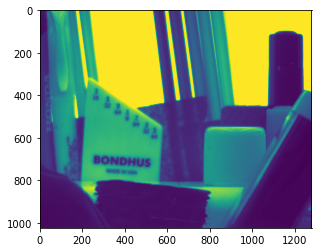

In [3]:
mean_img1 = np.mean(filt_1, axis = 0)
mean_img2 = np.mean(filt_2, axis = 0)
mean_img3 = np.mean(filt_3, axis = 0)
mean_img4 = np.mean(filt_4, axis = 0)
mean_img5 = np.mean(filt_5, axis = 0)
mean_img6 = np.mean(filt_6, axis = 0)


plt.figure()
plt.imshow(mean_img2)

In [4]:
tf = scipy.io.loadmat("transfer_functions.mat") #Taken from blackboard
tf

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb 25 14:51:59 2016',
 '__version__': '1.0',
 '__globals__': [],
 'F': array([[2.41e-08, 2.59e-08, 4.74e-08, ..., 2.31e-06, 1.91e-06, 1.74e-06],
        [2.80e-08, 5.24e-08, 1.33e-09, ..., 3.60e-07, 2.67e-07, 1.85e-07],
        [8.06e-08, 1.37e-07, 7.38e-08, ..., 4.10e-06, 3.78e-06, 3.47e-06],
        ...,
        [1.17e-06, 1.26e-06, 9.84e-07, ..., 3.68e-08, 1.80e-08, 3.41e-08],
        [7.45e-08, 5.25e-08, 7.59e-08, ..., 2.24e-09, 1.88e-08, 5.27e-08],
        [1.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00]]),
 'dl': array([[0.09259149, 0.10443501, 0.11692848, 0.13005401, 0.14379373,
         0.15812977, 0.17304426, 0.18851931, 0.20453706, 0.22107962,
         0.23812913, 0.25565246, 0.27355545, 0.29172871, 0.31006283,
         0.32844842, 0.34677606, 0.36493637, 0.38281994, 0.40031736,
         0.41731924, 0.43373436, 0.44954428, 0.46474875, 0.4793475 ,
         0.4933403 , 0.50672688, 0.51950

# A Matrix

In [6]:
# Make noise for D_epsilon
epsilon = 1e-5
s3 = np.eye(3)*epsilon
s7= np.eye(7)*epsilon
#mu, sigma = 0, 0.01 # mean and standard deviation
#s7 = np.random.normal(mu, sigma, (7,7))
#s3 = np.random.normal(mu, sigma, (3,3))


FFt = np.dot(F, np.transpose(F))+s7
invFFt = inv(FFt)

LtL = np.dot(np.transpose(L), L)+s3
invLtL = inv(LtL)


print(invLtL.shape)
print(invFFt.shape)
print(L.T.shape)

(3, 3)
(7, 7)
(3, 351)


In [7]:
#epsilon = s.reshape((1, -1))
D = np.divide(1, (np.multiply(db, dl, ds) + epsilon))
D = np.multiply(np.eye(351),D)
print(D.shape)
#print(db.shape)
#print(ds.shape)
#print(dl.shape)

(351, 351)


In [8]:
#print(np.multiply(db, dl, ds).shape)
print(invLtL.shape)
print(L.T.shape)
print(D.shape)
print(F.T.shape)
print(invFFt.shape)

#print(db1.shape)
#print(ds.shape)
#print(dl.shape)
#print(np.multiply(invLtL @ L.T, D).shape)


(3, 3)
(3, 351)
(351, 351)
(351, 7)
(7, 7)


In [9]:
A = invLtL @ L.T @ D @ F.T @ invFFt

In [22]:
print(A.shape)
print(A)

(3, 7)
[[-1.21157772e+00 -1.37070991e+00 -1.32792460e+00 -1.60515984e+00
  -1.52219776e+00 -3.58196050e+01  6.20761659e-01]
 [ 5.53261481e+01  5.96273073e+01  5.55892588e+01  6.69071148e+01
   6.34370236e+01  1.54955164e+03 -2.58700372e+01]
 [-2.82541765e+02 -3.04487777e+02 -2.83680427e+02 -3.39712056e+02
  -3.23807066e+02 -7.90634903e+03  1.32102180e+02]]


In [11]:
#SVD

data_stacked = np.array([mean_img1, mean_img2, mean_img3, mean_img4, mean_img5, mean_img6])
mean = np.mean(data_stacked, axis = 0)
std = np.std(data_stacked, axis = 0)
data_centered = np.subtract(data_stacked, mean)
data_standardized = data_centered/std
data_standardized.shape

(6, 1024, 1280)

In [12]:
#construct correlation matrix
#[a, b, c = data_standardized.shape()
data_reshaped = np.reshape(data_standardized, (6, 1024*1280))
#data_reshaped.shape
correlation_matrix = np.dot(data_reshaped, np.transpose(data_reshaped))
correlation_matrix.shape

(6, 6)

In [13]:
u, s, vh = np.linalg.svd(correlation_matrix)

In [14]:
print(s)
print(u)

[4.57151393e+06 1.97562419e+06 9.94449928e+05 2.08423121e+05
 1.14308824e+05 1.30985876e-09]
[[-0.38039517  0.10900512  0.66036923 -0.4835636  -0.08264052  0.40824829]
 [-0.31170305  0.55901969 -0.31086879  0.19977279  0.53583856  0.40824829]
 [ 0.15677434  0.35589063 -0.28724054  0.04144033 -0.7732222   0.40824829]
 [ 0.80099835 -0.0372851   0.04821227 -0.28400352  0.32766199  0.40824829]
 [-0.30117129 -0.66773827 -0.48902144 -0.23949461  0.0159734   0.40824829]
 [ 0.03549682 -0.31889207  0.37854928  0.76584862 -0.02361123  0.40824829]]


# The calculation of the x_out

In [42]:
# Test Image: 


test = np.reshape(out[0, :], (1024, 1280))
# remove first column of A just to test. 


A_del = np.delete(A, 0, axis=1)


pic = np.zeros(out[1,:].shape)
print(out.shape[1])
print(pic[0])
print(pic.shape)
for i in range(out.shape[1]):
    pic[i] = db @ L @ A_del @ out[:,i] # (3x1) array 
    

1310720
0.0
(1310720,)


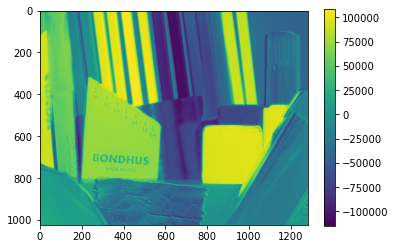

In [43]:
plt.imshow(np.reshape(pic, (1024, 1280)))
plt.colorbar()

In [30]:
print(out.shape)
pix = A_del @ out[:,1] 
print(pix.shape)

(6, 1310720)
(3,)


In [15]:
#data_stackedreshaped = np.reshape(data_stacked, (6, 1024*1280))
out = np.dot(u, data_reshaped)

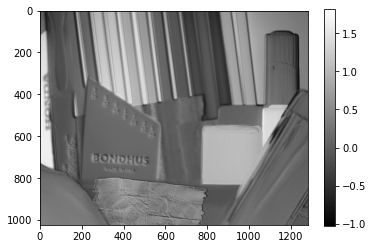

In [16]:
#filt_1 visualization
plt.imshow(np.reshape(out[0, :], (1024, 1280)), cmap = 'gray')
plt.colorbar()

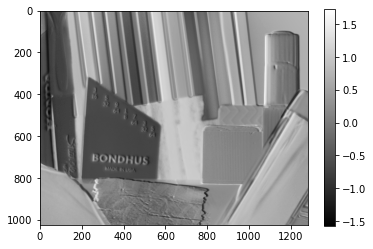

In [17]:
plt.imshow(np.reshape(out[1, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

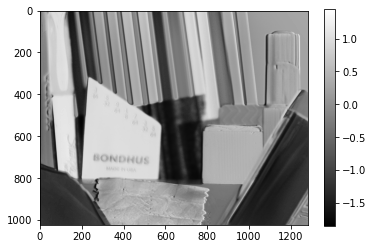

In [18]:
plt.imshow(np.reshape(out[2, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

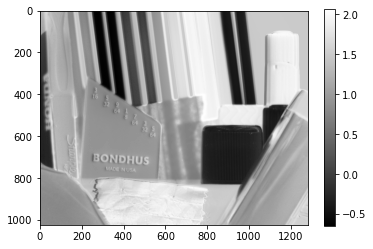

In [19]:
plt.imshow(np.reshape(out[3, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

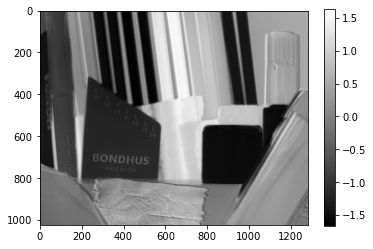

In [20]:
plt.imshow(np.reshape(out[4, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

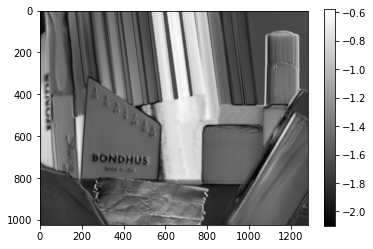

In [21]:
#plt.figure()
plt.imshow(np.reshape(out[5, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [44]:
L = tf['L']
F = tf['F']
db = tf['db1']
dl = tf['dl']
ds = tf['ds']

# Make noise for D_epsilon
eps = [1e-5, 1e-4, 1e-3, 1e-2]
for i in range(len(eps)):
    epsilon = eps[i]
    s3 = np.eye(3)*epsilon
    s7= np.eye(7)*epsilon

    FFt = np.dot(F, np.transpose(F))+s7
    invFFt = inv(FFt)

    LtL = np.dot(np.transpose(L), L)+s3
    invLtL = inv(LtL)

    D = np.divide(1, (np.multiply(db, dl, ds) + epsilon))
    D = np.multiply(np.eye(351),D)

    A = invLtL @ L.T @ D @ F.T @ invFFt

In [ ]:


test = np.reshape(out[0, :], (1024, 1280))
# remove first column of A just to test. 

A_del = np.delete(A, 0, axis=1)

pic = np.zeros(out[1,:].shape)
print(out.shape[1])
print(pic[0])
print(pic.shape)
for i in range(out.shape[1]):
    pic[i] = db @ L @ A_del @ out[:,i] # (3x1) array 